# Explanatory Notebook

In [94]:
# import libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

The Erdos-Renyi model consists of an Bernoulli's proccess in which $p$ is the probability of connection between two edges for n vertices.

This is the algorithm to generate this random graph, note that is for an undirected graph $G(n, p)$:
```
   for i in 1 to n:
     for j in i + 1 to n:
       if(rand() < p):
         G.add_edge(i, j)
         G.add_edge(j, i)
```

Note that the graph starts with no connection and this algorithm assumes the use of an adjacency matrix.


## Centrality
Centrality is a measure of importance of each vertice of the network taken from the network structure. The degree centrality expresses the centrality in terms of the degree of the vertice, that is, from the number of vertices connected to it. 


## Inference over the distribution

The distribution of centrality of the $G(n, p)$ model is described as a binomial distribution for $k$ connections between vertices, where each vertices can connect to $N - 1$ vertices of the network, that is, $P(k) = {n - 1 \choose k} p^k (1 - p)^{n - 1 - k}$ it follows that $\langle k \rangle = (N - 1)p$.


# Erdos-Renyi model - $G(n, p)$

Creating an Erdos-Renyi graph with probability of connection $p = 0.3$ and $100$ vertices.






In [95]:
n = 100
p = 0.3
g = nx.gnp_random_graph(n, p)
# g = nx.erdos_renyi_graph(n, p)
degree = nx.degree_centrality(g)

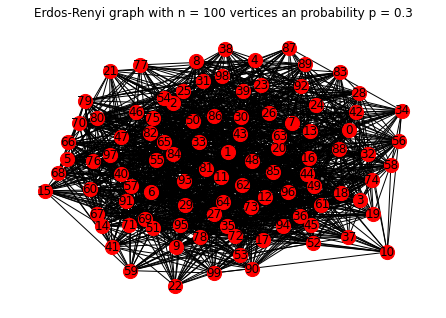

In [96]:
nx.draw(g, node_color='red', with_labels=True, node_size=200, nodelist=degree.keys())
plt.title("Erdos-Renyi graph with n = 100 vertices an probability p = 0.3")
plt.show()

## Distribution of degree centrality

0.3038383838383838


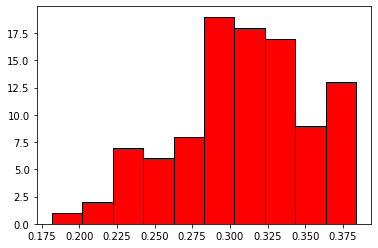

In [97]:
plt.hist(degree.values(), bins=10, color = 'red', histtype='bar', ec='black')
print(np.mean(list(degree.values())))

(array([ 4.,  3.,  9., 19., 24., 16., 13., 11.,  0.,  1.]),
 array([0.46464646, 0.49393939, 0.52323232, 0.55252525, 0.58181818,
        0.61111111, 0.64040404, 0.66969697, 0.6989899 , 0.72828283,
        0.75757576]),
 <a list of 10 Patch objects>)

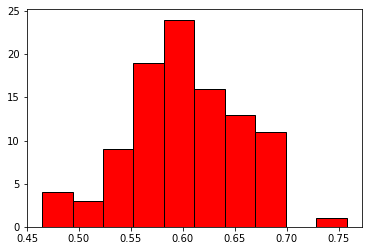

In [98]:
p = 0.6
g = nx.gnp_random_graph(n, p)
degree = nx.degree_centrality(g)
plt.hist(nx.degree_centrality(g).values(), bins=10, color = 'red', histtype='bar', ec='black')

As said before, the mean value of the distribution is $\langle k \rangle = (N - 1)p$, this means that the histogram is highly dependent of the probability $p$ of two nodes connect. 
- For $p = 0.3$ we have $\langle k \rangle = (100 - 1) \cdot 0.3 = 29.7 $
  Note that the function `degree_centrality` normalizes the values, so the normalized $\langle k \rangle$ is 
  $$ \langle k \rangle = 0.297 $$
- For $p = 0.6 \Longrightarrow \langle k \rangle = 0.594$.

# Barabási–Albert model - $BA$



In the $BA$ model generates random scale-free networks where the 
nodes with more connections tends to have more new connections than others, in this kind of graph the nodes at the periphery have few connections, opposed to the ones at the center.

## The algorithm for genereting an $BA$ graph
Given an very small $m_0$ number of vertices and at each time step add 
new vertice with $m$ edges, where $m < m_0$. The probability that a vertice
$i$ receives a connection from a new node is proportional to the degree of the vertice $i$. This is known as `preferential attachment`.
$$ \prod(K_i) = \frac{k_i}{\sum_{j} k_j}$$



In [99]:
n = 100
m = 3
G = nx.barabasi_albert_graph(n, m)
degree = nx.degree_centrality(G)

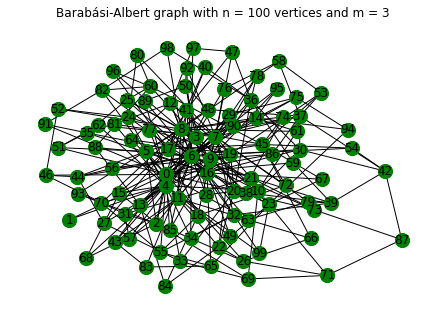

In [100]:
nx.draw(G, node_color = 'green', with_labels = True, node_size = 200, nodelist=degree.keys())
plt.title("Barabási-Albert graph with n = 100 vertices and m = 3")
plt.show()

(array([72., 12.,  8.,  3.,  0.,  1.,  1.,  1.,  1.,  1.]),
 array([0.02020202, 0.05151515, 0.08282828, 0.11414141, 0.14545455,
        0.17676768, 0.20808081, 0.23939394, 0.27070707, 0.3020202 ,
        0.33333333]),
 <a list of 10 Patch objects>)

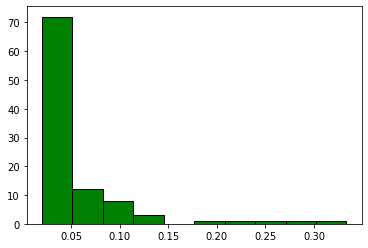

In [101]:
degree = nx.degree_centrality(G)
plt.hist(nx.degree_centrality(G).values(), bins=10, color = 'green', histtype='bar', ec='black')

The degree centrality distribution of the two models of random graphs differe because the first one obeys a binomial distribution and the de $BA$ model obeys a power law $P(k) \sim k^{-\gamma}$.

# References

- [Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html)

- [Youtube - Grafos aleatórios](https://www.youtube.com/watch?v=IZGf8hYA4_M&list=PLSc7xcwCGNh0HHNJlZBMBK6MzpdwNSzVT&index=9)

- [Wikipedia - Barabási–Albert model](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model#Degree_distribution)

- [Wikipedia - Erdős–Rényi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model)
